In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
tickers = ["BTC-USD", "^GSPC", "GC=F"]
period = "5y"
interval = "1d"

# Corrected column parameter
ij = pd.DataFrame(columns=tickers)

for ticker in tickers:
    data = yf.download(ticker, period=period, interval=interval)

    # Ensure that 'Close' exists in data
    if "Close" in data:
        ij[ticker] = data["Close"]

# Corrected method name
rij = ij.pct_change()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-23-147230cb3268>:16: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  rij = ij.pct_change()


\Bitcoin (BTC-USD), S&P 500 (^GSPC), et l'or (Gold - GC=F)

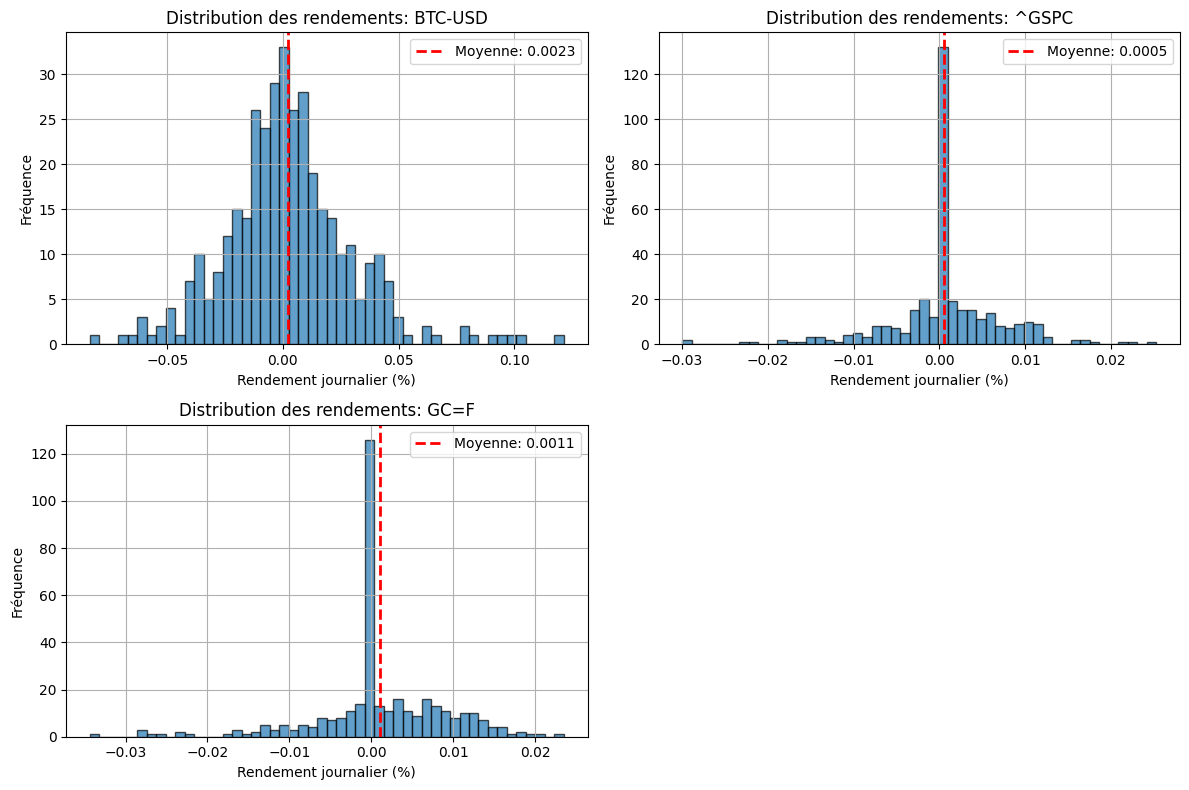

In [ ]:
# Création des histogrammes pour chaque ticker
plt.figure(figsize=(12, 8))

for i, ticker in enumerate(tickers, 1):
    plt.subplot(2, 2, i)  # Création de sous-graphiques (2x2)

    data = rij[ticker].dropna()
    mean_value = data.mean()  # Calcul de la moyenne

    plt.hist(data, bins=50, edgecolor="black", alpha=0.7)
    plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f"Moyenne: {mean_value:.4f}")  # Trait pour la moyenne

    plt.xlabel("Rendement journalier (%)")
    plt.ylabel("Fréquence")
    plt.title(f"Distribution des rendements: {ticker}")
    plt.legend()
    plt.grid(True)

# Ajustement de l'affichage
plt.tight_layout()
plt.show()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
<ipython-input-20-0dbfafe12c2f>:24: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = prices.pct_change()


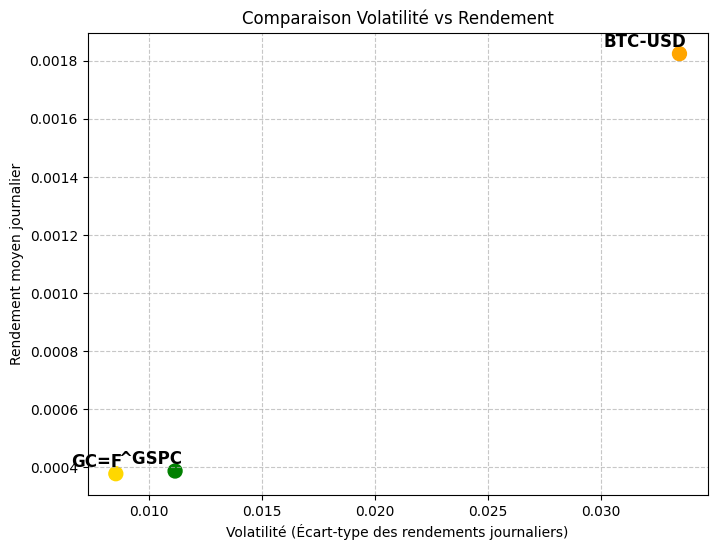

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


# Définition des actifs
tickers = ["BTC-USD", "^GSPC", "GC=F"]
period = "5y"
interval = "1d"

# Téléchargement des données
prices = pd.DataFrame()

for ticker in tickers:
    data = yf.download(ticker, period=period, interval=interval)

    # Vérification que la colonne 'Close' existe
    if not data.empty and "Close" in data:
        prices[ticker] = data["Close"]


# Calcul des rendements journaliers
returns = prices.pct_change()


# Calcul du rendement moyen et de la volatilité
mean_return = returns.mean()  # Moyenne des rendements journaliers
volatility = returns.std()  # Écart-type des rendements (volatilité)

# Création du scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(volatility, mean_return, color=['orange', 'green', 'gold'], s=100)

# Ajout des labels pour chaque actif
for i, ticker in enumerate(tickers):
    plt.annotate(ticker, (volatility[ticker], mean_return[ticker]),
                 textcoords="offset points", xytext=(5,5), ha='right',
                 fontsize=12, fontweight='bold')

# Labels et titre
plt.xlabel("Volatilité (Écart-type des rendements journaliers)")
plt.ylabel("Rendement moyen journalier")
plt.title("Comparaison Volatilité vs Rendement")

# Grille
plt.grid(True, linestyle="--", alpha=0.7)

# Affichage du graphique
plt.show()


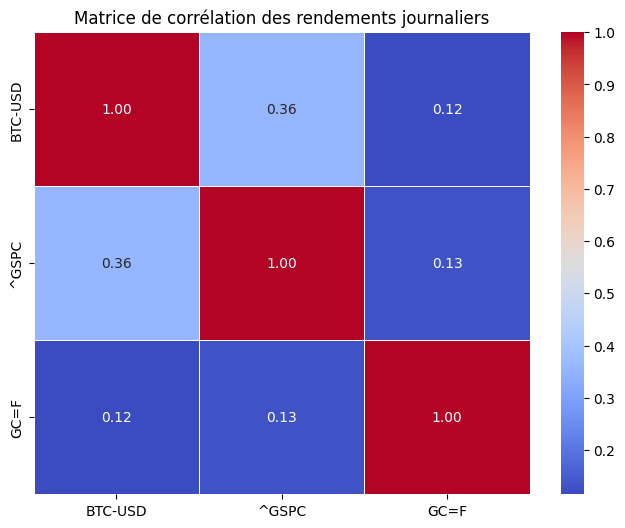

In [ ]:
corr_matrix = rij.corr()
import seaborn as sns
# Affichage de la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des rendements journaliers")
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd

# Télécharger les données de BPCE (remplacer 'BPCE' par le bon ticker si nécessaire)
ticker = 'GC=F'  # Assurez-vous que 'BPCE.PA' est le bon ticker sur Yahoo Finance
data = yf.download(ticker, start='2020-12-31', end='2025-10-02')  # 25 ans de données

# Afficher les premières lignes du dataset
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price             Close         High          Low         Open Volume
Ticker             GC=F         GC=F         GC=F         GC=F   GC=F
Date                                                                 
2020-12-31  1893.099976  1901.300049  1892.699951  1897.000000    127
2021-01-04  1944.699951  1945.099976  1912.199951  1912.199951    154
2021-01-05  1952.699951  1952.699951  1941.300049  1941.699951    113
2021-01-06  1906.900024  1959.900024  1901.500000  1952.000000    331
2021-01-07  1912.300049  1926.699951  1912.000000  1922.599976    122


In [ ]:
import numpy as np

# Calcul du rendement logarithmique quotidien
data['Log_Ret_Daily'] = np.log(data['Close'] / data['Close'].shift(1))

# Calcul du rendement logarithmique mensuel
data['Log_Ret_Monthly'] = data['Close'].resample('ME').last().pct_change().apply(lambda x: np.log(1 + x))

# Calcul du rendement logarithmique annuel
data['Log_Ret_Yearly'] = data['Close'].resample('YE').last().pct_change().apply(lambda x: np.log(1 + x))

# Affichage des rendements
print(data[['Log_Ret_Daily', 'Log_Ret_Monthly', 'Log_Ret_Yearly']].dropna().head())


Price      Log_Ret_Daily Log_Ret_Monthly Log_Ret_Yearly
Ticker                                                 
Date                                                   
2021-12-31      0.008131        0.029938      -0.035267
2024-12-31      0.008825       -0.010518       0.242809


In [ ]:
# Calcul des statistiques descriptives
summary_stats = data[['Log_Ret_Daily', 'Log_Ret_Monthly', 'Log_Ret_Yearly']].describe()

# Afficher le tableau des statistiques descriptives
print(summary_stats)

Price  Log_Ret_Daily Log_Ret_Monthly Log_Ret_Yearly
Ticker                                             
count    1033.000000       34.000000       2.000000
mean        0.000424        0.009471       0.103771
std         0.009260        0.038390       0.196629
min        -0.047183       -0.071737      -0.035267
25%        -0.004349       -0.017590       0.034252
50%         0.000535        0.000002       0.103771
75%         0.006070        0.036734       0.173290
max         0.031070        0.073811       0.242809


In [ ]:
!pip install arch

GARCH

/usr/local/lib/python3.11/dist-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 8.566e-05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 9763795.382041229
Iteration:      2,   Func. Count:     18,   Neg. LLF: 68334760265.666504
Iteration:      3,   Func. Count:     32,   Neg. LLF: -3377.9425521209573
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3377.9425538310916
            Iterations: 7
            Function evaluations: 32
            Gradient evaluations: 3
                     Constant Mean - GARCH Model Results                      
Dep. Variable:             Log Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3377.94
Distribution:                  Normal   AIC:                          -6747.89
Method:            Maximum Likelihood   BIC:                          -6728.12
                                        No. Observations:                 1033
Date:              

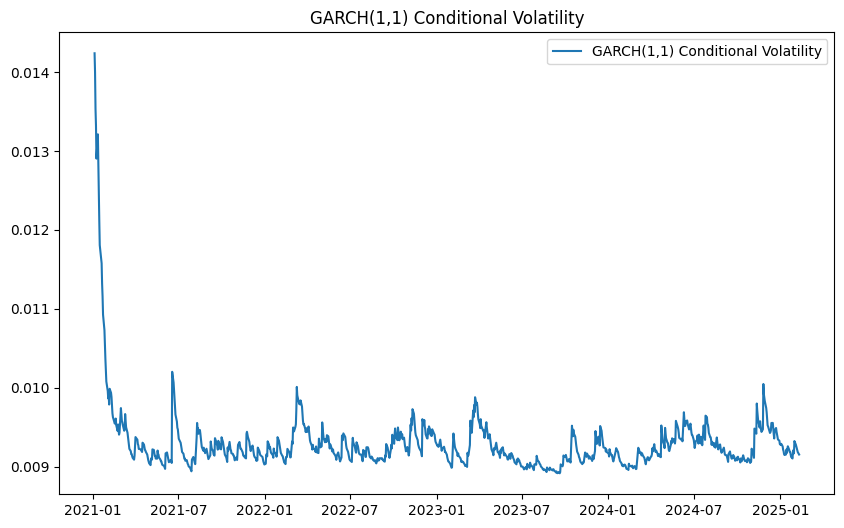

In [ ]:
from arch import arch_model
data['Log Return'] = np.log(data['Close'] / data['Close'].shift(1))
# GARCH(1,1) model fitting
model = arch_model(data['Log Return'].dropna(), vol='Garch', p=1, q=1)
results = model.fit()
print(results.summary())

# Plotting the conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(results.conditional_volatility, label='GARCH(1,1) Conditional Volatility')
plt.title('GARCH(1,1) Conditional Volatility')
plt.legend()
plt.show()

Monter carlo

[*********************100%***********************]  3 of 3 completed
<ipython-input-62-1fb8766a36b9>:12: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = data.pct_change().dropna()


Portefeuille avec le meilleur Sharpe Ratio :
BTC-USD    0.223290
^GSPC      0.608580
GC=F       0.168131
Name: 2180, dtype: float64
Rendement annuel attendu : 18.75%
Volatilité : 16.43%
Sharpe Ratio : 1.14


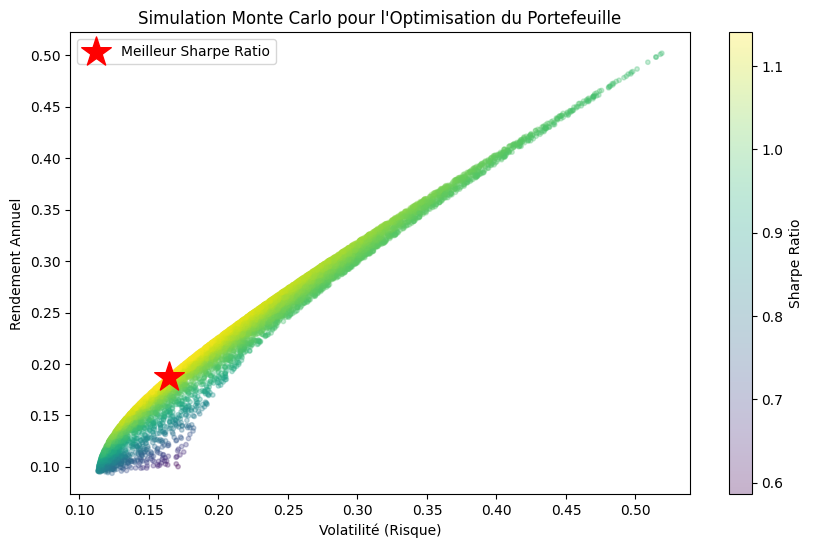

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Définition des tickers et téléchargement des données historiques
tickers = ["BTC-USD", "^GSPC", "GC=F"]
# On télécharge les cours ajustés sur la période du 1er janvier 2018 au 31 décembre 2023
data = yf.download(tickers, start="2020-01-01", end="2025-01-31")["Close"]

# 2. Calcul des rendements quotidiens et préparation des données
returns = data.pct_change().dropna()

# Calcul des rendements moyens journaliers et annualisés (en supposant 252 jours de trading par an)
mean_daily_returns = returns.mean()
annual_returns = mean_daily_returns * 252

# Calcul de la matrice de covariance annualisée
cov_daily = returns.cov()
annual_cov = cov_daily * 252

# 3. Simulation Monte Carlo
num_portfolios = 10000  # Nombre de portefeuilles simulés

# Matrice pour stocker les résultats : chaque colonne contiendra [volatilité, rendement, Sharpe Ratio]
results = np.zeros((3, num_portfolios))
# Liste pour stocker les allocations (poids) pour chaque portefeuille
all_weights = []

# Boucle de simulation
for i in range(num_portfolios):
    # Génération d'allocations aléatoires pour chaque ticker
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalisation pour que la somme des poids soit égale à 1
    all_weights.append(weights)

    # Calcul du rendement annuel attendu du portefeuille
    portfolio_return = np.sum(annual_returns * weights)

    # Calcul de la volatilité (écart-type annualisé) du portefeuille
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(annual_cov, weights)))

    # Calcul du ratio de Sharpe (avec taux sans risque supposé égal à 0)
    sharpe_ratio = portfolio_return / portfolio_volatility

    # Stockage des résultats
    results[0, i] = portfolio_volatility
    results[1, i] = portfolio_return
    results[2, i] = sharpe_ratio

# Conversion des résultats en DataFrame pour faciliter l'analyse
results_df = pd.DataFrame(results.T, columns=["Volatilité", "Rendement", "Sharpe Ratio"])
weights_df = pd.DataFrame(all_weights, columns=tickers)

# 4. Identification du portefeuille avec le meilleur ratio de Sharpe
max_sharpe_idx = results_df["Sharpe Ratio"].idxmax()
max_sharpe_portfolio = weights_df.iloc[max_sharpe_idx]
max_sharpe_return = results_df.iloc[max_sharpe_idx]["Rendement"]
max_sharpe_volatility = results_df.iloc[max_sharpe_idx]["Volatilité"]
max_sharpe_ratio = results_df.iloc[max_sharpe_idx]["Sharpe Ratio"]

print("Portefeuille avec le meilleur Sharpe Ratio :")
print(max_sharpe_portfolio)
print("Rendement annuel attendu : {:.2f}%".format(max_sharpe_return * 100))
print("Volatilité : {:.2f}%".format(max_sharpe_volatility * 100))
print("Sharpe Ratio : {:.2f}".format(max_sharpe_ratio))

# 5. Visualisation des portefeuilles simulés et du portefeuille optimal
plt.figure(figsize=(10, 6))
scatter = plt.scatter(results_df["Volatilité"], results_df["Rendement"], c=results_df["Sharpe Ratio"],
                      cmap='viridis', marker='o', s=10, alpha=0.3)
plt.colorbar(scatter, label='Sharpe Ratio')
plt.scatter(max_sharpe_volatility, max_sharpe_return, marker='*', color='r', s=500, label='Meilleur Sharpe Ratio')
plt.title("Simulation Monte Carlo pour l'Optimisation du Portefeuille")
plt.xlabel("Volatilité (Risque)")
plt.ylabel("Rendement Annuel")
plt.legend()
plt.show()
